# Processamento FAMES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from importlib import reload

from lifa.licel import LicelLidarMeasurement
from lifa.processing import fit_checks; reload(fit_checks)
from lifa.processing import pre_processing; reload(pre_processing)

<module 'lifa.processing.pre_processing' from 'C:\\Users\\jairo\\OneDrive\\Documentos\\Git\\lifa\\lifa\\processing\\pre_processing.py'>

## Extrai dados

In [38]:
files = [ r"d:\Local - FAMES\Medidas\CEPEMA-setembro2025-20250917T201022Z-1-001\CEPEMA-setembro2025\20250912 GRID\a2591218.354537"]

files = [ r'd:\Local - FAMES\Medidas\CEPEMA-setembro2025-20250917T201022Z-1-001\CEPEMA-setembro2025\20250912 GRID\a2591218.382991',
          r'd:\Local - FAMES\Medidas\CEPEMA-setembro2025-20250917T201022Z-1-001\CEPEMA-setembro2025\20250912 GRID\a2591218.354537',
          r'd:\Local - FAMES\Medidas\CEPEMA-setembro2025-20250917T201022Z-1-001\CEPEMA-setembro2025\20250912 GRID\a2591218.362648',
          r'd:\Local - FAMES\Medidas\CEPEMA-setembro2025-20250917T201022Z-1-001\CEPEMA-setembro2025\20250912 GRID\a2591218.370762',
          r'd:\Local - FAMES\Medidas\CEPEMA-setembro2025-20250917T201022Z-1-001\CEPEMA-setembro2025\20250912 GRID\a2591218.374877' ]


files = [ r'd:\Local - FAMES\Medidas\CEPEMA-setembro2025-20250917T201022Z-1-001\CEPEMA-setembro2025\20250829 CEPEMA FAMES FULL\a2590216.531835']
dead_time = 1/240   #(1/200 MHz)

measurements = LicelLidarMeasurement(files)

upper_signal = {}
upper_signal['n2_raman_353'] = measurements.channels['00353.o_ph']
upper_signal['rayleigh_355'] = measurements.channels['00355.o_ph']
upper_signal['co2_raman_371'] = measurements.channels['00371.o_ph']
upper_signal['ch4_raman_395_s'] = measurements.channels['00395.s_ph']
upper_signal['ch4_raman_395_p'] = measurements.channels['00395.p_ph']
upper_signal['fluo_460'] = measurements.channels['00460.o_ph']
upper_signal['n2_raman_530'] = measurements.channels['00530.o_ph']
upper_signal['rayleigh_532'] = measurements.channels['00532.o_ph']

lower_signal = {}
lower_signal['n2_raman_353'] = measurements.channels['00353.o_an']
lower_signal['rayleigh_355'] = measurements.channels['00355.o_an']
lower_signal['co2_raman_371'] = measurements.channels['00371.o_an']
lower_signal['ch4_raman_395_s'] = measurements.channels['00395.s_an']
lower_signal['ch4_raman_395_p'] = measurements.channels['00395.p_an']
lower_signal['fluo_460'] = measurements.channels['00460.o_an']
lower_signal['n2_raman_530'] = measurements.channels['00530.o_an']
lower_signal['rayleigh_532'] = measurements.channels['00532.o_an']


z = measurements.channels['00355.o_an'].z



# pre process
idx_min = 4000
idx_max = 5000

for key,val in lower_signal.items():
    if lower_signal[key].is_photon_counting:
        lower_signal[key] = pre_processing.correct_count_rate_dead_time_nonparalyzable(lower_signal[key].average_profile(), dead_time)
        lower_signal[key], background_mean, background_std = pre_processing.subtract_background(lower_signal[key], idx_min, idx_max)
        signal_type = "photon counting rate [MHz]" 
    else:
        lower_signal[key], background_mean, background_std = pre_processing.subtract_background(lower_signal[key].average_profile(), idx_min, idx_max)
        signal_type = "analog [mV]"
    print('Signal: {}, type: {}, background mean: {}, std {}'.format(key, signal_type, background_mean, background_std))

for key,val in upper_signal.items():
    if upper_signal[key].is_photon_counting:
        upper_signal[key] = pre_processing.correct_count_rate_dead_time_nonparalyzable(upper_signal[key].average_profile(), dead_time)
        upper_signal[key], background_mean, background_std = pre_processing.subtract_background(upper_signal[key], idx_min, idx_max)
        signal_type = "photon counting rate [MHz]" 
    else:
        upper_signal[key], background_mean, background_std = pre_processing.subtract_background(upper_signal[key].average_profile(), idx_min, idx_max)
        signal_type = "analog [mV]"
    print('Signal: {}, type: {}, background mean: {}, std {}'.format(key, signal_type, background_mean, background_std))

Signal: n2_raman_353, type: analog [mV], background mean: 5.186447349721464, std 0.0012772255471767558
Signal: rayleigh_355, type: analog [mV], background mean: 5.033445972048707, std 0.0005454983483197089
Signal: co2_raman_371, type: analog [mV], background mean: 5.57467076722131, std 0.00208263409266929
Signal: ch4_raman_395_s, type: analog [mV], background mean: 5.350461924584576, std 0.0010626588211437235
Signal: ch4_raman_395_p, type: analog [mV], background mean: 5.479646473732846, std 0.0008659920353523772
Signal: fluo_460, type: analog [mV], background mean: 14.518516946068154, std 0.008119057972045037
Signal: n2_raman_530, type: analog [mV], background mean: 6.1227364867924665, std 0.0035327269192592502
Signal: rayleigh_532, type: analog [mV], background mean: 5.211302904294289, std 0.000623293614742424
Signal: n2_raman_353, type: photon counting rate [MHz], background mean: 2.0889334685078085, std 0.1429073357172885
Signal: rayleigh_355, type: photon counting rate [MHz], back

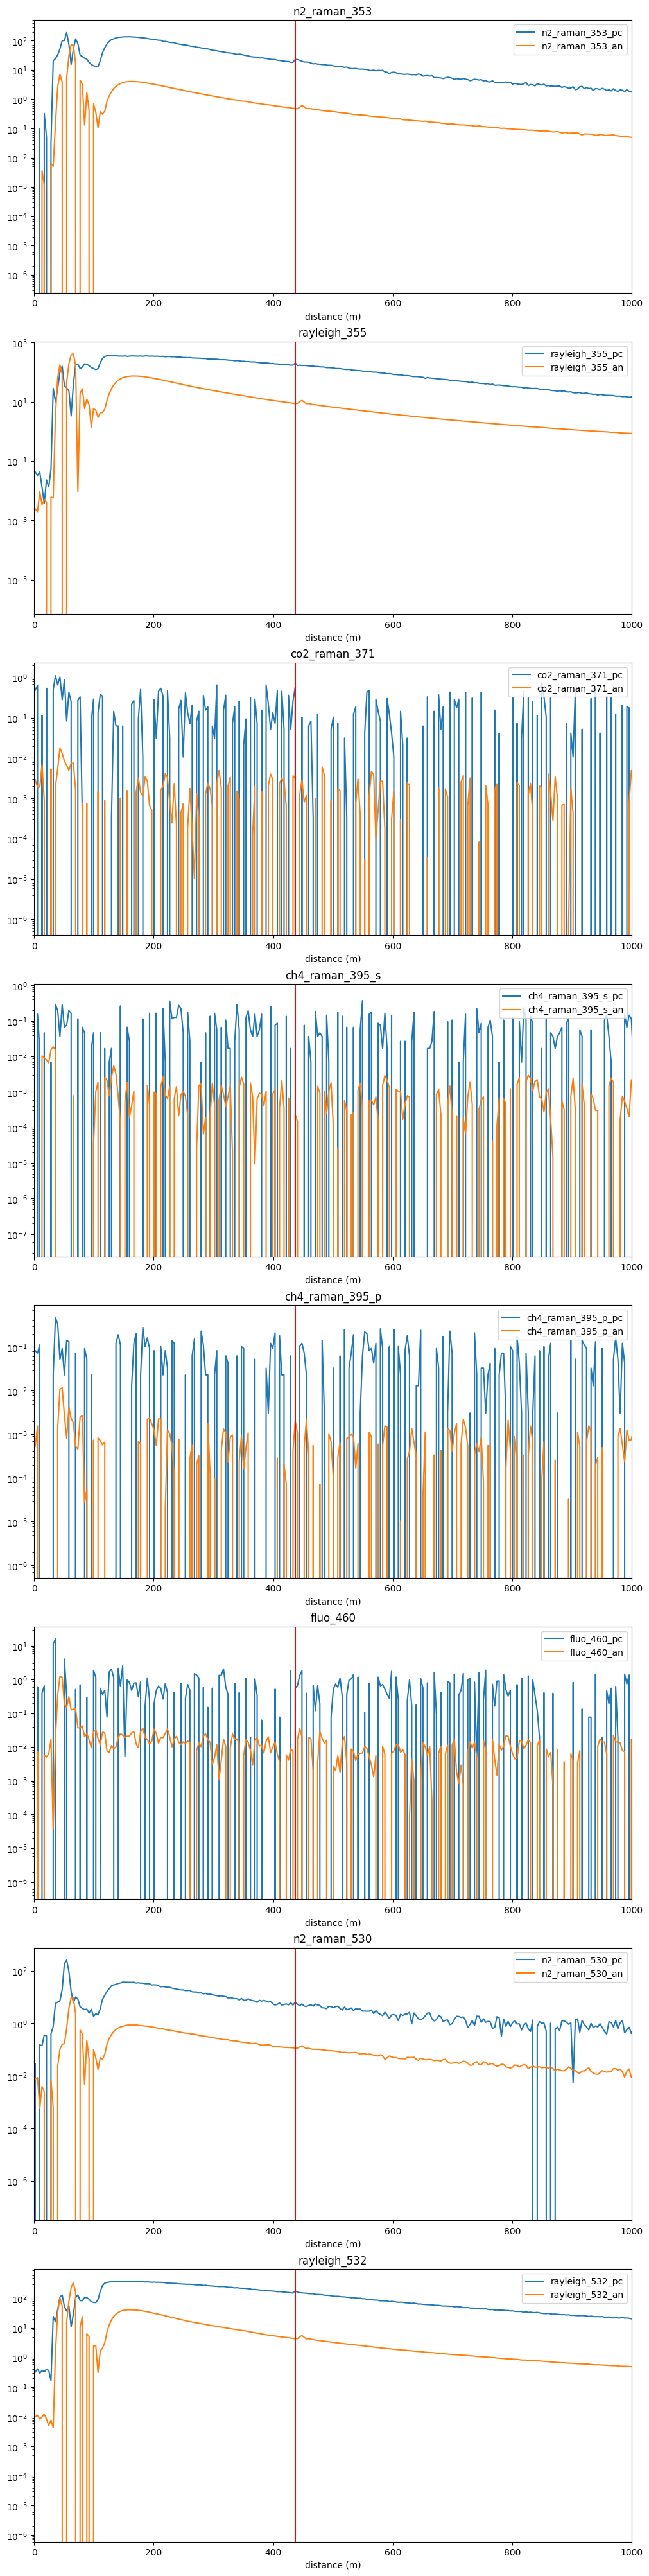

In [39]:
# apresenta todos sinais
#number_traces = len(licel_channels_names)
fig, ax = plt.subplots(nrows=len(upper_signal), figsize=(10,40), layout='constrained')
#plt.title('Photon-counting signal')
#fig.suptitle('Signals')
flare_pos = 437
for i,(key, data) in enumerate(upper_signal.items()):
    ax[i].plot(z, upper_signal[key], label=key+'_pc')
    ax[i].plot(z, lower_signal[key], label=key+'_an')
    ax[i].set_yscale('log')
    ax[i].axvline(flare_pos, 0, 1, color='r')
    
    #plt.plot(z, non_paralyzable_corrected, 'g', label='Non paralyzable')

    #ax[i].plot(trace[0], trace[1], label=name, marker=',')
    ax[i].set_title(key)
    #ax[i].grid(True, 'both')
    #ax[i].minorticks_on()
    ax[i].set_xlabel('distance (m)')
    #ax[i].set_ylabel('signal (mV)')
    ax[i].legend(loc='upper right')
    ax[i].set_xlim(0,1000)
#plt.legend()
#plt.xlim(100,500)

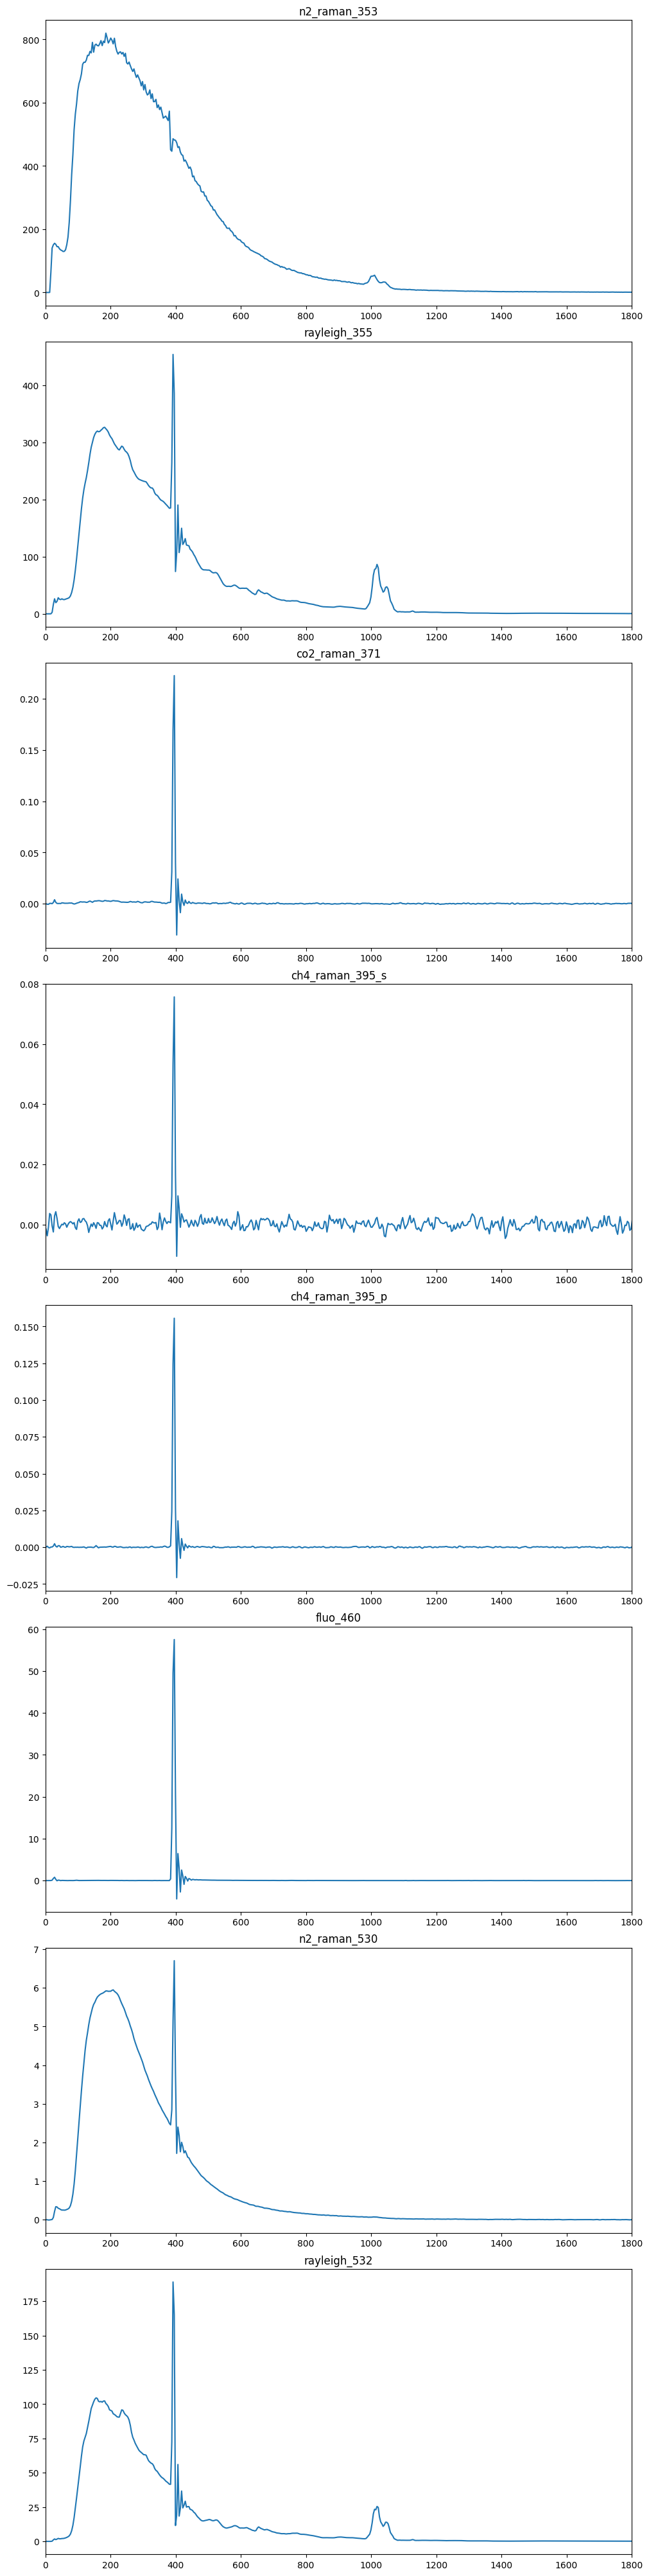

In [70]:
# apresenta todos sinais
#number_traces = len(licel_channels_names)
fig, ax = plt.subplots(nrows=len(signals), figsize=(10,40), layout='constrained')
#plt.title('Photon-counting signal')
#fig.suptitle('Signals')
for i,(name, data) in enumerate(signals.items()):
    ax[i].plot(z, data, label=name)
    #plt.plot(z, non_paralyzable_corrected, 'g', label='Non paralyzable')

    #ax[i].plot(trace[0], trace[1], label=name, marker=',')
    ax[i].set_title(name)
    #ax[i].grid(True, 'both')
    #ax[i].minorticks_on()
    #ax[i].set_xlabel('distance (m)')
    #ax[i].set_ylabel('signal (mV)')
    #ax[i].legend(loc='upper right')
    ax[i].set_xlim(0,1800)
#plt.legend()
#plt.xlim(100,500)

In [25]:
teste['a'] = 10

In [4]:
measurements.channels

OrderedDict([('00355.o_an', <lifa.licel.LicelChannel at 0x26a110b1400>),
             ('00355.o_std_an', <lifa.licel.LicelChannel at 0x26a7ffb5d10>),
             ('00355.o_ph', <lifa.licel.LicelChannel at 0x26a7ffb5e50>),
             ('00355.o_std_ph', <lifa.licel.LicelChannel at 0x26a7fe97230>),
             ('00395.s_an', <lifa.licel.LicelChannel at 0x26a7fe97360>),
             ('00395.s_std_an', <lifa.licel.LicelChannel at 0x26a60d6f650>),
             ('00395.s_ph', <lifa.licel.LicelChannel at 0x26a7ff16f10>),
             ('00395.s_std_ph', <lifa.licel.LicelChannel at 0x26a7ff16e00>),
             ('00353.o_an', <lifa.licel.LicelChannel at 0x26a7fd7d850>),
             ('00353.o_std_an', <lifa.licel.LicelChannel at 0x26a7ff47c50>),
             ('00353.o_ph', <lifa.licel.LicelChannel at 0x26a7ff47d50>),
             ('00353.o_std_ph', <lifa.licel.LicelChannel at 0x26a11104050>),
             ('00371.o_an', <lifa.licel.LicelChannel at 0x26a11104150>),
             ('00371.o_std_

In [ ]:
# Measurements files
# Makes average of files under same label.
files = [ r"D:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Meio chama p=23mm bom pra caralho"]

measurements = LicelLidarMeasurement(files)



# Licel Channels of interest
licel_channels_names = ['00355.o_an', '00355.o_ph','00395.s_an',  '00395.s_ph','00353.o_an', '00353.o_ph', '00371.o_an', '00371.o_ph', 
                        '00395.p_an', '00395.p_ph', '00460.o_an', '00460.o_ph', '00532.o_an',  '00532.o_ph','00530.o_an', '00530.o_ph']

# Get files list in each directory
measurement_files = {}
for (label, files) in files_list.items():
    measurement_files[label] = glob.glob(files)

# Read files
measurements = {}
for i,(name, files) in enumerate(measurement_files.items()):
    measurements[name] = LicelLidarMeasurement(files)
    #measurements[titles[i]] = LicelLidarMeasurement(files)

rayleight_355 = 




# Subset by channels
measurements_full = {}
for name, data in measurements.items():
    measurements_full[name] = data.subset_by_channels(licel_channels_names)

# Subset by bins
bin_min = 0
bin_max = 200
measurements_subset = {}
for name, data in measurements_full.items():
    measurements_subset[name] = measurements_full[name].subset_by_bins(bin_min,bin_max)

# Average measurements on a channel 
measurements_average = {}
for name, data in measurements_subset.items():
    signal = []
    for channel_name, channel in measurements_subset[name].channels.items():
        signal.append([channel.z, channel.average_profile()])
        distance = channel.z
    signal = np.array(signal)
    measurements_average[name] = signal

## Plot averages

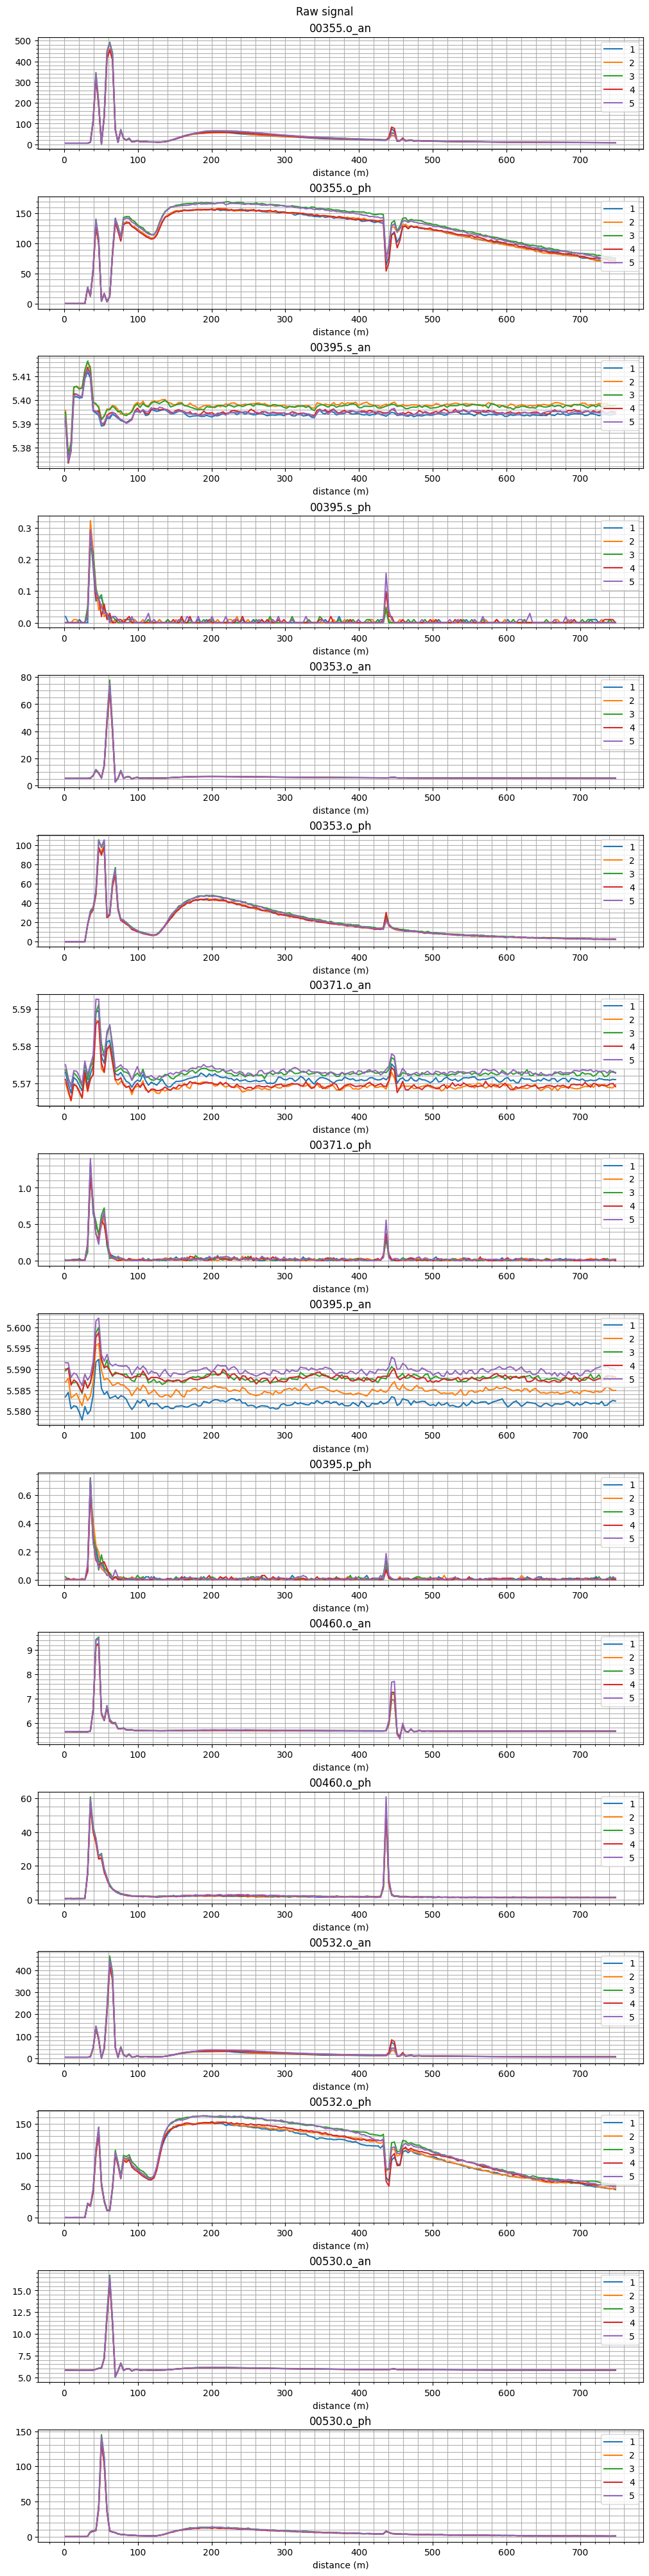

In [4]:
number_traces = len(licel_channels_names)
fig, ax = plt.subplots(nrows=number_traces, figsize=(10,40), layout='constrained')
fig.suptitle('Raw signal')
for name, data in measurements_average.items():
    for i,trace in enumerate(measurements_average[name]):
        ax[i].plot(trace[0], trace[1], label=name, marker=',')
        ax[i].set_title(licel_channels_names[i])
        ax[i].grid(True, 'both')
        ax[i].minorticks_on()
        ax[i].set_xlabel('distance (m)')
        #ax[i].set_ylabel('signal (mV)')
        ax[i].legend(loc='upper right')

## Save to a file

In [4]:
fig.savefig('atmosfera.png')